In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go
from scenario import*
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
scenarios = []
def extract_scenarios_from_text_files(directory):
    for root, dirs, files in os.walk(directory):
        for dir in dirs:
            source_dir = os.path.join(root, dir)
            for file in os.listdir(source_dir):
                print(file)
                if file.endswith('.txt'):
                    file_path = os.path.join(source_dir, file)
                    try:
                        scenario = Scenario(file_path)
                        scenarios.append(scenario)
                    except Exception as e:
                        print(f"An error occurred while processing {file_path}: {e}")
                        continue
    return scenarios

def scenarios_to_dataframe(scenarios):
    data_dicts = [scenario.to_dict() for scenario in scenarios]
    return pd.DataFrame(data_dicts)

def plot_interactive(df):
    def update_plot(x, y):
        fig = px.scatter(df, x=x, y=y, title=f'{x} vs {y}', labels={x: x, y: y})
        fig.show()

    columns = df.columns
    interact(update_plot, x=columns, y=columns)

# Example usage
logs_directory = r'data\coaxial'
scenarios = extract_scenarios_from_text_files(logs_directory)
data_frame = scenarios_to_dataframe(scenarios)
print(data_frame)

if not data_frame.empty:
    plot_interactive(data_frame)
else:
    print("No data available for plotting.")


results_50dBm_STA_1MHz
results_50dBm_STA_2MHz
results_60dBm_STA_1MHz
results_60dBm_STA_2MHz
results_70dBm_STA_1MHz
results_70dBm_STA_2MHz
results_50dBm_STA_1MHz
results_50dBm_STA_2MHz
results_60dBm_STA_1MHz
results_60dBm_STA_2MHz
results_70dBm_STA_1MHz
results_70dBm_STA_2MHz
coaxial_txpwr0_1Mhz_50dBm.txt
An error occurred while processing data\coaxial\logs\results_50dBm_STA_1MHz\coaxial_txpwr0_1Mhz_50dBm.txt: invalid literal for int() with base 10: 'None'
coaxial_txpwr10_1Mhz_50dBm.txt
coaxial_txpwr11_1Mhz_50dBm.txt
coaxial_txpwr12_1Mhz_50dBm.txt
coaxial_txpwr13_1Mhz_50dBm.txt
coaxial_txpwr14_1Mhz_50dBm.txt
coaxial_txpwr15_1Mhz_50dBm.txt
coaxial_txpwr16_1Mhz_50dBm.txt
coaxial_txpwr17_1Mhz_50dBm.txt
coaxial_txpwr18_1Mhz_50dBm.txt
coaxial_txpwr19_1Mhz_50dBm.txt
coaxial_txpwr1_1Mhz_50dBm.txt
coaxial_txpwr20_1Mhz_50dBm.txt
coaxial_txpwr2_1Mhz_50dBm.txt
coaxial_txpwr3_1Mhz_50dBm.txt
coaxial_txpwr4_1Mhz_50dBm.txt
coaxial_txpwr5_1Mhz_50dBm.txt
coaxial_txpwr6_1Mhz_50dBm.txt
coaxial_txpwr7_1Mhz

interactive(children=(Dropdown(description='x', options=('Test Name', 'Timestamp', 'Test Type', 'Distance', 'A…

C:\Users\raffoul\AppData\Local\Temp\ipykernel_4516\3541372379.py:26: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.

C:\Users\raffoul\AppData\Local\Temp\ipykernel_4516\3541372379.py:27: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.



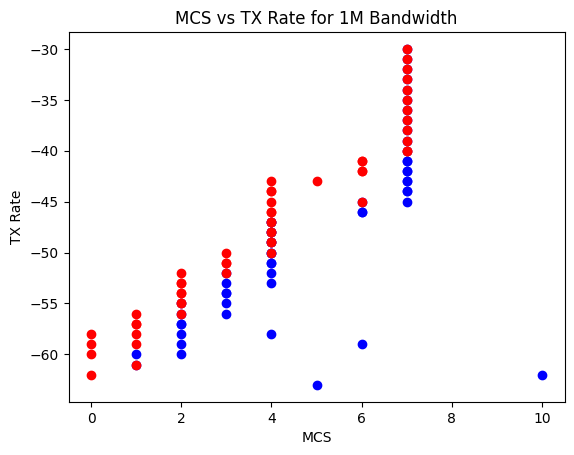

In [14]:
scenarios[0].bandwidth

scenario_1M = []
scenario_2M = []

for scenario in scenarios:
    if scenario.bandwidth == '1M':
        scenario_1M.append(scenario)
    else:
        scenario_2M.append(scenario)


mcs_1m =[]
tx_rate_1m = []
for scenario in scenario_1M:
    mcs_1m.append(scenario.mcs)
    tx_rate_1m.append(scenario.total_gain)

mcs_2m =[]
tx_rate_2m = []
for scenario in scenario_2M:
    mcs_2m.append(scenario.mcs)
    tx_rate_2m.append(scenario.total_gain)


plt.plot(mcs_1m, tx_rate_1m, 'ro', color='blue')
plt.plot(mcs_2m, tx_rate_2m, 'ro', color='red')
plt.xlabel('MCS')
plt.ylabel('TX Rate')
plt.title('MCS vs TX Rate for 1M Bandwidth')

plt.show()

        